# Convergence

Training convergence figures.

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [2]:
EXP_NAME = 'evaluate1'

# ddpg
ALGO_NAME = 'ddpg'
filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate1/20210517-074007/log.pickle"
# dql
# ALGO_NAME = 'dql'
# filepath = "D:\Dev/sys-simulator-2\DATA\DQL\SCRIPT52\\20210508-144816\\log.pickle"
# a2c
ALGO_NAME = 'a2c'
filepath = "D:\\Dev\\sys-simulator-2\\data\\a2c\\script16\\20210509-134816\\log.pickle"
# output path
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}/{ALGO_NAME}'

file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

In [3]:
data.keys()

dict_keys(['mue_availability', 'mue_sinrs', 'd2d_sinrs', 'd2d_tx_powers', 'trajectories', 'mue_tx_powers'])

In [4]:
mue_availability = np.array(data['mue_availability'])
mue_availability.shape

1000

In [5]:
d_train = data['train_bags']
d_test = data['test_bags']
d_train.keys()

dict_keys(['mue_sinrs', 'd2d_sinrs', 'collected_states', 'rewards'])

In [6]:
xx = d_test['mue_sinrs']
xx = np.array(xx)
xx.shape

(10000,)

In [7]:
xx = d_train['mue_sinrs']
xx = np.array(xx)
xx.shape

(20, 10000)

In [8]:
mue_sinrs = deepcopy(d_train['mue_sinrs'])
mue_sinrs.append(d_test['mue_sinrs'])
mue_sinrs = np.array(mue_sinrs)
mue_sinrs.shape

(21, 10000)

In [9]:
d2d_sinrs = np.array(data['d2d_sinrs'])
d2d_sinrs.shape

(21, 10000, 2)

In [10]:
d2d_tx_powers = np.array(data['d2d_tx_powers'])
d2d_tx_powers.shape

(21, 10000)

In [11]:
mue_tx_powers = np.array(data['mue_tx_powers'])
mue_tx_powers.shape

(21, 10000, 2)

## Fonts config

In [12]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}


## Ticks

In [13]:
x = list(range(mue_sinrs.shape[0]))

## MUE SINR

In [14]:
x = np.ones(mue_sinrs.shape)
for i in range(mue_sinrs.shape[0]):
    x[i, :] = i
x = x.reshape(-1)
x *= EVAL_EVERY

In [15]:
mu = mue_sinrs.mean(axis=1)
std = mue_sinrs.std(axis=1)
conf95 = 1.96 * std / np.sqrt(mue_sinrs.shape[1])

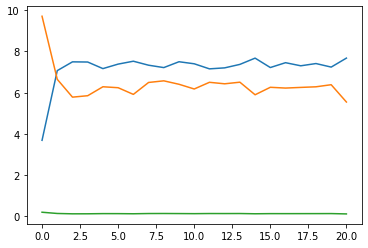

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_sinrs.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE Tx power

D:\Dev\sys-simulator-2\figs\convergencia\a2c\mue-sinr.svg


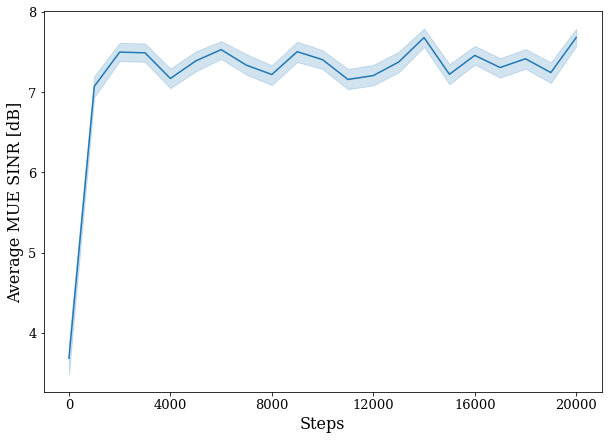

In [17]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_tx_powers.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE Tx Power [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-txpowers'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## D2D SINR

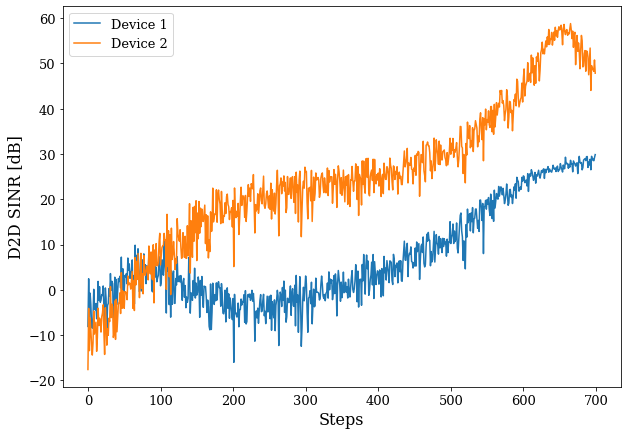

In [18]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

D:\Dev\sys-simulator-2\figs\convergencia\a2c\d2d-sinr.svg


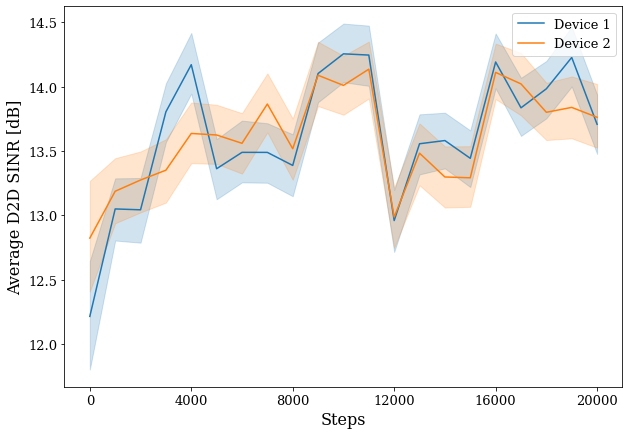

In [19]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 1')
# sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr-device1'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

D:\Dev\sys-simulator-2\figs\convergencia\a2c\mue-availability.svg


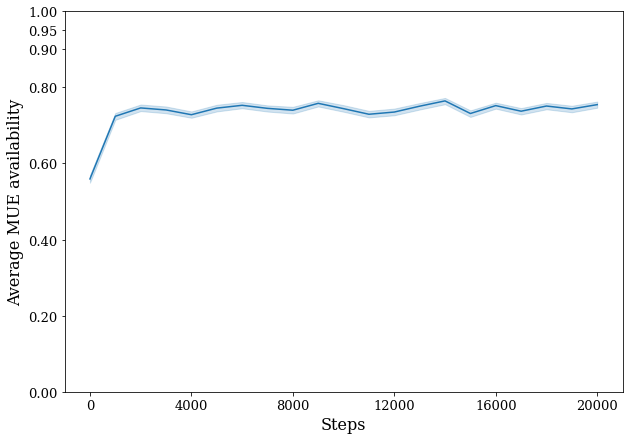

In [20]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-txpower'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## Rewards

D:\Dev\sys-simulator-2\figs\convergencia\a2c\rewards.svg


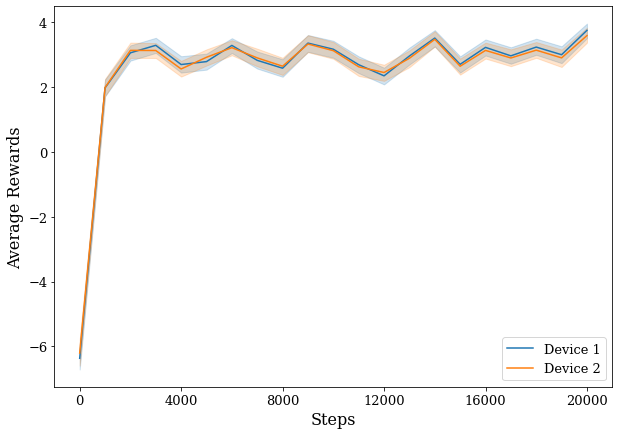

In [21]:
plt.figure(figsize=(10,7))
# sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-txpower'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

/home/lucas/dev/sys-simulator-2/figs/evaluate1/dql\mue-availability.svg


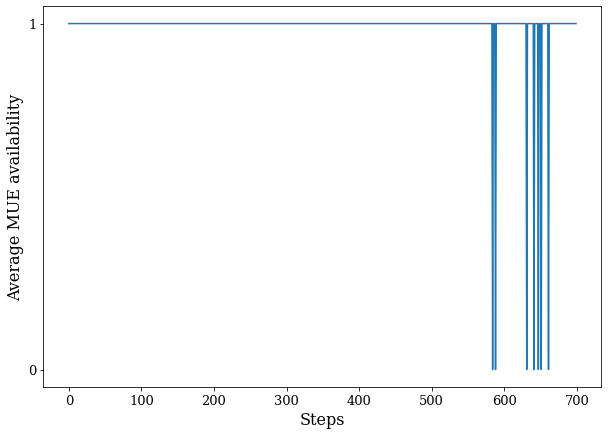

In [111]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_availability.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE availability', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks([0., 1.], **ticks_font)
fig_name = 'mue-availability'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

# Avg availability

In [112]:
np.mean(mue_availability)

0.99